In [21]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

import pandas as pd
import pickle as pkl

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [12]:
path_to_usdb_csv = './sd_GT_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [13]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdb.vec',skiprows=1)
n_params = len(usdb)

In [14]:
n_transitions = len(df_usdb[df_usdb['include']==True])
print('# transitions =', n_transitions)

# transitions = 185


In [24]:
df_usdb[(df_usdb['deltaJ']==0) & (df_usdb['Tmirror']==True)]

,Unnamed: 0,parent,daughter,decay,Zi,Ni,Exi,Ji,ni,Zf,Nf,Exf,Jf,nf,I(%),sigma_I(%),logft,sigma_logft,Bexp,sigma_B,sigma_B/B,include,twoJi,twoJf,Bth,Tmirror,deltaJ,Bth_gA2,Berr_gA2,Berr
92,110,19Ne,19F,b+ec,10,9,0.0,1/2,1,9,10,0.0,1/2,1,99.9880,0.0020,3.2329,0.0024,3.594948,0.019866,0.005526,True,1,1,2.761313,True,0.0,4.524135,-1.929188,0.833635
97,115,21Na,21Ne,b+ec,11,10,0.0,3/2,1,10,11,0.0,3/2,1,94.9300,0.1300,3.6080,0.0070,1.515628,0.024429,0.016118,True,3,3,0.485667,True,0.0,0.795717,-0.280089,1.029961
101,126,23Mg,23Na,b+ec,12,11,0.0,3/2,1,11,12,0.0,3/2,1,91.3000,0.2000,3.6720,0.0010,1.307954,0.003012,0.002303,True,3,3,0.267444,True,0.0,0.438180,-0.130226,1.040510
115,140,25Al,25Mg,b+ec,13,12,0.0,5/2,1,12,13,0.0,5/2,1,99.1100,0.0800,3.5700,0.0100,1.654217,0.038090,0.023026,True,5,5,0.615360,True,0.0,1.008206,-0.353989,1.038857
124,167,27Si,27Al,b+ec,14,13,0.0,5/2,1,13,14,2734.9,5/2,2,0.0170,0.0130,5.0000,0.4000,0.061460,0.056607,0.921034,True,5,5,0.099198,True,0.0,0.162526,-1.101066,-0.037738
134,177,29P,29Si,b+ec,15,14,0.0,1/2,1,14,15,0.0,1/2,1,98.2900,0.0300,3.6812,0.0004,1.280538,0.001179,0.000921,True,1,1,0.232412,True,0.0,0.380784,-0.100246,1.048126
144,193,31S,31P,b+ec,16,15,0.0,1/2,1,15,16,0.0,1/2,1,98.8600,0.0400,3.6786,0.0004,1.288227,0.001187,0.000921,True,1,1,0.287997,True,0.0,0.471854,-0.183627,1.000230
146,195,31S,31P,b+ec,16,15,0.0,1/2,1,15,16,3134.3,1/2,2,0.0322,0.0012,4.7700,0.0200,0.104374,0.004807,0.046052,True,1,1,0.074872,True,0.0,0.122670,-1.018296,0.029502
163,212,33Cl,33S,b+ec,17,16,0.0,3/2,1,16,17,0.0,3/2,1,98.5800,0.1900,3.7471,0.0010,1.100253,0.002533,0.002303,True,3,3,0.171291,True,0.0,0.280643,-0.180390,0.928962
166,215,33Cl,33S,b+ec,17,16,0.0,3/2,1,16,17,2312.7,3/2,2,0.0350,0.0050,5.6500,0.0600,0.013759,0.001901,0.138155,True,3,3,0.009187,True,0.0,0.015052,-1.001293,0.004572


In [17]:
gA = 1.28

df_usdb['Bth_gA2'] = df_usdb['Bth']*gA**2


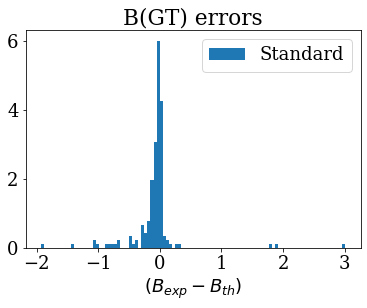

In [25]:
df_usdb['Fermi'] = (df_usdb['Tmirror']==True) & (df_usdb['deltaJ']==0) & (df_usdb['Exf']==0.0)
df_usdb['Berr_gA2'] = df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Fermi']
df_usdb['Berr'] = df_usdb['Bexp']-df_usdb['Bth']

y = np.array(df_usdb['Berr_gA2'])
plt.hist(y, bins=optimal_n_bins(y), density=True, label='Standard')
plt.title(f'B(GT) errors')
plt.xlabel(r'$(B_{exp} - B_{th})$')
plt.legend()
plt.show()

Simply using $g_A$ at the free-nucleon value, unquenched, we have this distribution of absolute errors for B(GT)

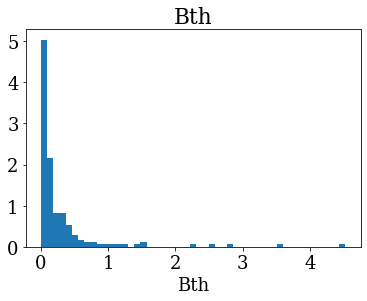

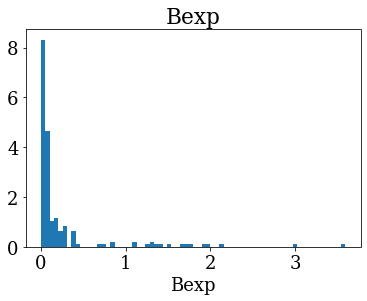

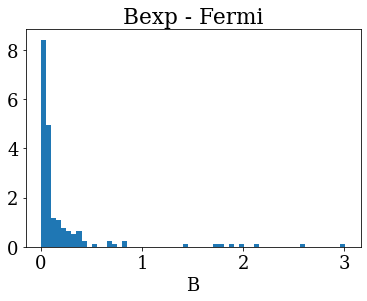

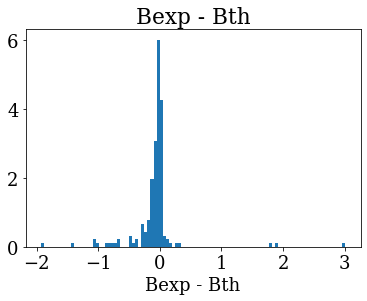

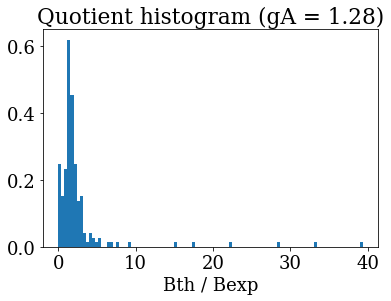

In [27]:
y = np.array(df_usdb['Bth_gA2'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bth')
plt.xlabel('Bth')
plt.show()

y = np.array(df_usdb['Bexp'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp')
plt.xlabel('Bexp')
plt.show()

y = np.array(df_usdb['Bexp'] - 1*df_usdb['Fermi'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp - Fermi')
plt.xlabel('B')
plt.show()

y = np.array(df_usdb['Bexp'] - df_usdb['Bth_gA2'] - 1*df_usdb['Fermi'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp - Bth')
plt.xlabel('Bexp - Bth')
plt.show()

y = np.array(df_usdb['Bth_gA2'] / (df_usdb['Bexp'] - 1*df_usdb['Fermi']))
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Quotient histogram (gA = {gA})')
plt.xlabel('Bth / Bexp')
plt.show()

In [28]:
from scipy.optimize import minimize

def objective(dBap,q,df):
    chi_squared = np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2)) 
    dof = n_transitions - n_params
    return (chi_squared/dof - 1)**2

dBap = minimize(objective,x0=0.5,args=(0.77,df_usdb),bounds=[(0,10000)]).x[0]

In [29]:
print('a priori B(GT) std. dev. =', dBap)
print('a priori B(GT) variance =', dBap**2)

a priori B(GT) std. dev. = 0.563587022755636
a priori B(GT) variance = 0.31763033221856174


In [30]:
df_usdb['Bresid'] = df_usdb['Berr']/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)
df_usdb['Bresid_gA2'] = (df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Tmirror'])/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)